<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

The numpy library is used to handle matrixes.

Matplotlib to plot and handle the plots of the data.

ListedColormap is used for the boudary ploting.

In [12]:
microchips = np.genfromtxt('microchips.csv', delimiter=',')          # Read the microchips.csv file.

microchipsX1 = microchips[:,0]      # Save X1 values.
microchipsX2 = microchips[:,1]      # Save X2 values.
microchipsY = microchips[:,2]       # Save Y  values.

#print("X- values: ", microchipsX)                                       # Print Xs.
#print("Y-values: ", microchipsY)                                        # Prints Ys.

The needed datas are set here. 

The microchips.csv file is read using np.genfromtx.

Spilting up the as X1,X2-features and Y-labels.

<b> Exercise 5.1: Use Logistic regression and mapFeatures from the previous exercise to construct nine
different classifiers </b>

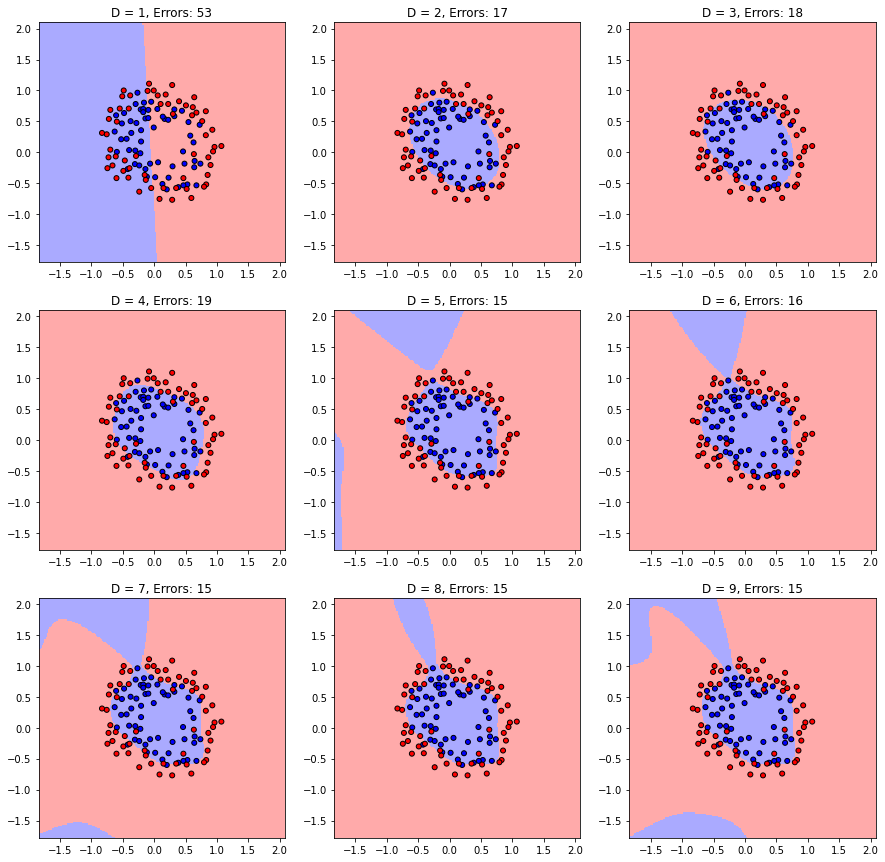

In [13]:
# Can also be used for createing Xne, based on lecture  5 slide 22.
def mapFeature(X1,X2,D, Ones): # Pyton
    one = np.ones([len(X1),1])
    if Ones:
        Xe = np.c_[one,X1,X2] # Start with [1,X1,X2]
    else:
        Xe = np.c_[X1,X2] # Start with [1,X1,X2]

    for i in range(2,D+1):
        for j in range(0,i+1):
            Xnew = X1**(i-j)*X2**j # type (N)
            Xnew = Xnew.reshape(-1,1) # type (N,1) required by append
            Xe = np.append(Xe,Xnew,1) # axis = 1 ==> append column
    return Xe

# Used to print the results with model, gradient descent and classifier.
def printResults(D, C):
    
    logreg = LogisticRegression(solver='lbfgs', C=C, tol=1e-6,max_iter=10000)
    Xe =  mapFeature(microchipsX1,microchipsX2,D,Ones=False) # No 1-column!
    logreg.fit(Xe,microchipsY) # fit the model with data

    #  predict each mesh point
    pX = logreg.predict(Xe) # predict                                                 # classify mesh ==> probabilities.
    errors = np.sum(pX!=microchipsY) # compare y with y_pred

    #Plotting Boundaries can  be found at  lecture 5 slide 21.
    h = 0.02                                                                        # The size determines the granularity of the grid.
    x1_min, x1_max = microchipsX1.min()-1, microchipsX1.max()+1                     # Get the min and max x-value. 
    x2_min, x2_max = microchipsX2.min()-1, microchipsX2.max()+1                     # Get the min and max y-value.
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h)) # Mesh Grid.
    x1,x2 = xx.ravel(), yy.ravel()                                                  # Turn to two Nx1 arrays.
    XXe =  mapFeature(x1,x2,D,Ones=False)                                           # No 1-column!
   

    #  predict each mesh point
    p = logreg.predict(XXe) # predict                                               # classify mesh ==> probabilities.
    classes = p>0.5
    clz_mesh = classes.reshape(xx.shape)                                                  # return to mesh format, compare y with y_pred

    # Create mesh plot color
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

     
    plt.subplot(3,3,D)
    plt.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light,shading='auto')
    plt.scatter(microchipsX1, microchipsX2, c=microchipsY , marker=".",cmap=cmap_bold, s=100, edgecolor='k')
    plt.title("D = " +str(D)  +", Errors: " +str(errors)) # Title with corresponding training errors.




plt.figure(figsize=(15, 15))    # Size of figure
for i in range(1,10):           # Run model for D = 1 to 9.
    printResults(D=i,C=10000) # Run degree 2 model.



Here Logistic regression and mapFeatures is used to contruct nine different classifiers. One for each degree d ∈ [1, 9], and produce a figure containing a
3 × 3 pattern of subplots showing the corresponding decision boundaries.

The out print is constructed using the function printResults(D,C). D is for the current deegre, and C is for the current C.


The argument C=10000 is used here.


<b> Exercise 5.2: Redo 1) but now use the regularization parameter C = 1. What is different than from the
step in 1)? </b>

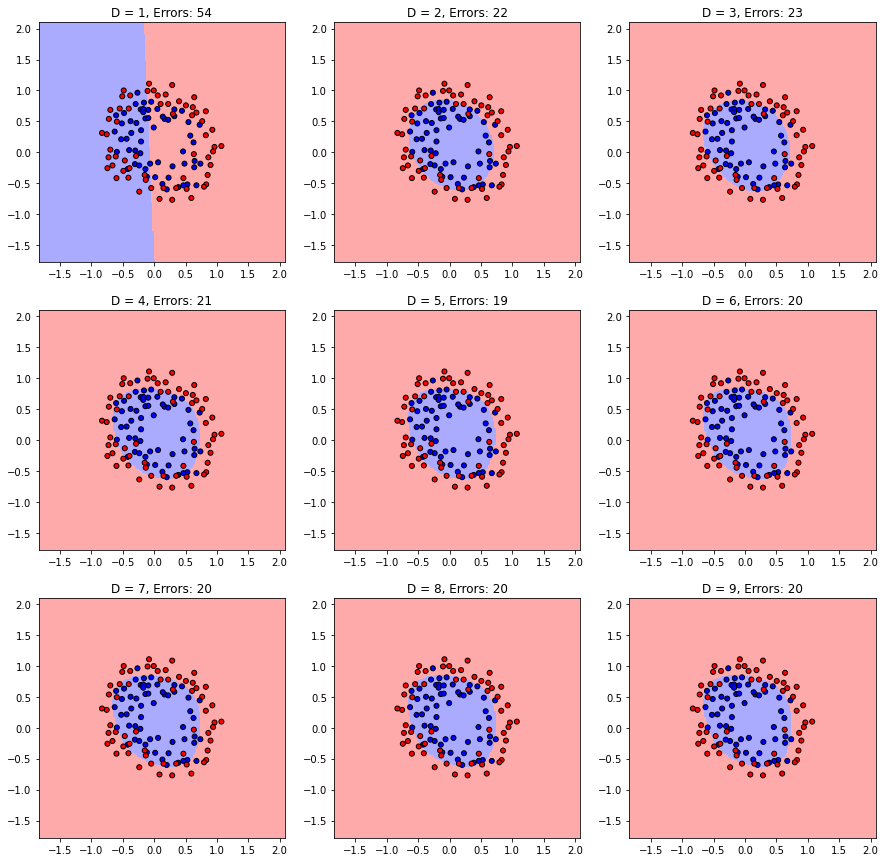

In [14]:
plt.figure(figsize=(15, 15))
for i in range(1,10):
    printResults(D=i,C=1) # Run degree 2 model.

There is a "blue" decision boundary that splits the data into two halfs for deegree 1 in both C = 1 and C = 10000. The asumpted degree 1 model is already here under fit since the the data is more advanced than this, and it can not be "fixed" with regularization only.

The C is used for regularization to avoid bad results due to high variance (over fittness), increasing the C will decrease the regularization penalty since C  = 1/λ,

which will lead to a more overfit model.

If we instead decreasing C will increase the regularization penalty. This means that the regularization constant will start to take over the data model, and the model will becoem more underfit.

For this data C = 1 indicates a high regularization and the decion boundery will NOT expand in order to over fit the data, the model will be under fit, which can be seen in the second plot.

In the first plot where C = 10000, we can see that find some errors outside the "circled" decision boundery are not ignored. A blue boundery "outside" the "focused" is here connected to these data points. There are therefore less errors, and the regularization  parameter (lambda) is here very which indicates that the model is more prone to overfitness.

<b> Exercise 5.3: Finally, you should use cross-validation (in sklearn) to see which of the regularized and
unregularized models performs best. </b>

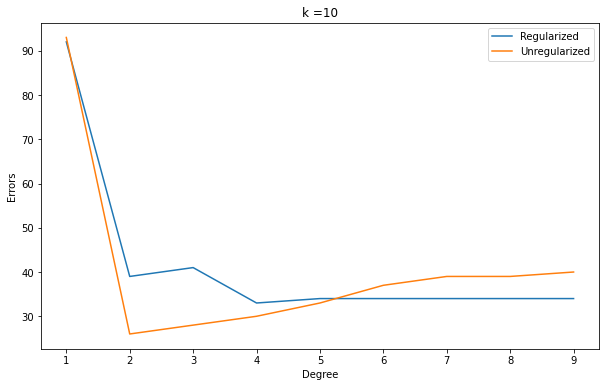

In [15]:
from sklearn.model_selection import cross_val_predict

k= 10
crossValReg = [] # Holding the cross val errors results.


fig, ax = plt.subplots(figsize=(10, 6))
# Used to print the results with model, gradient descent and classifier.

def crossValResults(D, C):
    logreg = LogisticRegression(solver='lbfgs', C=C, tol=1e-6,max_iter=10000)
    Xe =  mapFeature(microchipsX1,microchipsX2,D,Ones=False) # No 1-column!
    logreg.fit(Xe,microchipsY) # fit the model with data
    crossPredict = cross_val_predict(logreg, Xe, microchipsY, cv=k)
    errors = np.sum(crossPredict!=microchipsY) # compare y with y_pred
    crossValReg.append(errors)
    

crossValReg = []
for i in range(1,10):
    crossValResults(D=i,C=1) # Loop through deegrees with regularization parameter C = 1.
ax.plot(list(range(1,10)), crossValReg, '-', label='Regularized')

crossValReg = []
for i in range(1,10):
    crossValResults(D=i,C=10000) # Loop through deegrees with regularization parameter C = 10000.
ax.plot(list(range(1,10)), crossValReg, '-', label='Unregularized')

ax.legend()
plt.xlabel('Degree')
plt.ylabel('Errors')
plt.title('k ='+str(k))
plt.show()

Here  cross-validation in sklearn i used to compare regularized and unregularized models. 

The unregularized model uses C = 10000, and regularzized uses C = 1. This since C = 1/λ , where λ  is the regularization constant.

The results are then visualized in a graph where  the degree  vs. errors is ploted. Regularized is blue and unregularized is orange.

We see here that the errors increase more with the deegree for the unregularized data.

And this is the goal with regularization. Decrease overfitness.